AnnData https://anndata.readthedocs.io/en/latest/anndata.AnnData.html

In [1]:
!mkdir write

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.9.4 louvain==0.7.0


In [4]:
results_file = 'write/autism.h5ad'  # the file that will store the analysis results

In [6]:
data_dir = "/data/mohyelim7/scRNAseq/"
ad = sc.read_text(data_dir+"exprMatrix.tsv.gz")
meta = pd.read_csv(data_dir+"meta.tsv", sep="\t")
ad.var = meta

In [7]:
ad

AnnData object with n_obs × n_vars = 36501 × 104559
    var: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'

Values are 10x UMI counts from cellranger, log2-transformed
https://cells.ucsc.edu/?ds=autism

In [8]:
adata = ad.transpose()

/home/mohyelim7/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
adata

AnnData object with n_obs × n_vars = 104559 × 36501
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'

In [10]:
meta.head()

,cell,cluster,sample,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post-mortem interval (hours),RNA Integrity Number,genes,UMIs,RNA mitochondr. percent,RNA ribosomal percent
0,AAACCTGGTACGCACC-1_1823_BA24,Neu-NRGN-II,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,622,774,2.454780,1.421189
1,AAACGGGCACCAGATT-1_1823_BA24,L5/6,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,6926,24042,0.445055,0.428417
2,AAAGATGAGTCCAGGA-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,624,830,0.240964,0.722892
3,AAAGATGTCTTGAGGT-1_1823_BA24,OPC,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,1192,1771,0.225861,1.806889
4,AAAGCAAGTAATCACC-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,691,895,0.558659,0.670391


In [11]:
adata.var.head()

""
ENSG00000227232
ENSG00000243485
ENSG00000238009
ENSG00000233750
ENSG00000268903


In [13]:
genes = pd.read_csv(data_dir+"rawMatrix/genes.tsv", sep="\t", names=["gene_ids", "gene_names"])

In [14]:
genes.head()

,gene_ids,gene_names
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-3
3,ENSG00000243485,RP11-34P13.3
4,ENSG00000274890,MIR1302-9


In [15]:
def tsvToDic(dir_path):
    dic = {}
    with open(dir_path+"/genes.tsv") as f:
        for line in f:
            key, value = line.split("\t")
            dic[key]=value.strip()
    return dic

In [16]:
genes_dic = tsvToDic("/data/mohyelim7/scRNAseq/rawMatrix")
list(genes_dic.items())[:5]

[('ENSG00000223972', 'DDX11L1'),
 ('ENSG00000227232', 'WASH7P'),
 ('ENSG00000278267', 'MIR6859-3'),
 ('ENSG00000243485', 'RP11-34P13.3'),
 ('ENSG00000274890', 'MIR1302-9')]

In [17]:
adata.var_names

Index(['ENSG00000227232', 'ENSG00000243485', 'ENSG00000238009',
       'ENSG00000233750', 'ENSG00000268903', 'ENSG00000239906',
       'ENSG00000241860', 'ENSG00000279457', 'ENSG00000228463',
       'ENSG00000236601',
       ...
       'ENSG00000210174', 'ENSG00000212907', 'ENSG00000198886',
       'ENSG00000210176', 'ENSG00000210191', 'ENSG00000198786',
       'ENSG00000198695', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', length=36501)

In [18]:
df_id = pd.DataFrame({'gene_id' : list(adata.var_names)})
df_id.head()

,gene_id
0,ENSG00000227232
1,ENSG00000243485
2,ENSG00000238009
3,ENSG00000233750
4,ENSG00000268903


In [19]:
df_id.replace(to_replace=genes_dic, inplace=True)
df_id.head()

,gene_id
0,WASH7P
1,RP11-34P13.3
2,RP11-34P13.7
3,CICP27
4,RP11-34P13.15


In [20]:
adata.var.index = df_id['gene_id']

In [21]:
adata.var_names

Index(['WASH7P', 'RP11-34P13.3', 'RP11-34P13.7', 'CICP27', 'RP11-34P13.15',
       'RP11-34P13.14', 'RP11-34P13.13', 'FO538757.2', 'AP006222.2',
       'RP4-669L17.2',
       ...
       'MT-TR', 'MT-ND4L', 'MT-ND4', 'MT-TH', 'MT-TL2', 'MT-ND5', 'MT-ND6',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', name='gene_id', length=36501)

In [22]:
adata

AnnData object with n_obs × n_vars = 104559 × 36501
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'

In [23]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

# Preprocessing

normalizing counts per cell
    finished (0:00:10)


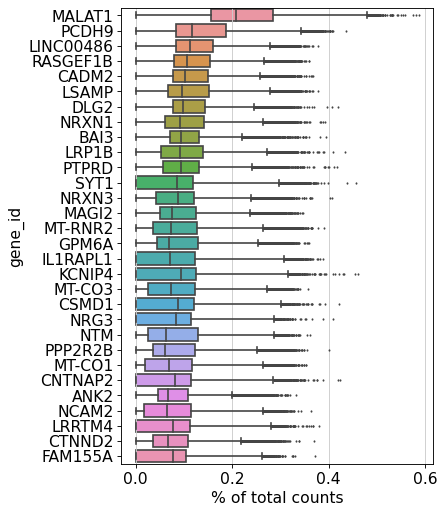

In [24]:
sc.pl.highest_expr_genes(adata, n_top=30, )

In [25]:
adata.obs.head()

,cell,cluster,sample,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post-mortem interval (hours),RNA Integrity Number,genes,UMIs,RNA mitochondr. percent,RNA ribosomal percent
0,AAACCTGGTACGCACC-1_1823_BA24,Neu-NRGN-II,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,622,774,2.454780,1.421189
1,AAACGGGCACCAGATT-1_1823_BA24,L5/6,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,6926,24042,0.445055,0.428417
2,AAAGATGAGTCCAGGA-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,624,830,0.240964,0.722892
3,AAAGATGTCTTGAGGT-1_1823_BA24,OPC,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,1192,1771,0.225861,1.806889
4,AAAGCAAGTAATCACC-1_1823_BA24,Oligodendrocytes,1823_BA24,1823,ACC,15,M,Control,CB8,SB3,18,7.0,691,895,0.558659,0.670391


In [26]:
adata.obs.genes.min()

500

Individual expression matrices containing numbers of Unique molecular identifiers (UMIs) per
nucleus per gene were filtered to retain nuclei with at least 500 genes expressed and less than 5%
of total UMIs originating from mitochondrial and ribosomal RNAs. Mitochondrial RNA genes
were filtered out as well to exclude transcripts coming from outside the nucleus to avoid biases 
introduced by nuclear isolation and ultracentrifugation. Individual matrices were combined, UMIs
were normalized to the total UMIs per nucleus and log transformed

In [ ]:
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
#              jitter=0.4, multi_panel=True)

In [ ]:
# sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
# ad = ad[ad.obs.n_genes_by_counts < 2500, :]
# ad = ad[ad.obs.pct_counts_mt < 5, :]

In [ ]:
# sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
# sc.pp.log1p(adata)

In [27]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:21)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


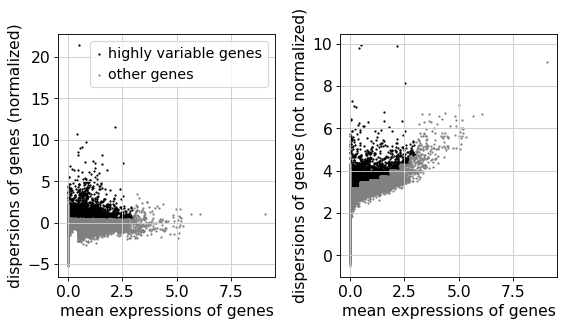

In [28]:
sc.pl.highly_variable_genes(adata)

In [29]:
adata.raw = adata

In [30]:
adata = adata[:, adata.var.highly_variable]

In [31]:
adata

View of AnnData object with n_obs × n_vars = 104559 × 7312
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [ ]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
# sc.pp.scale(adata, max_value=10)

# Principal component analysis

In [32]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:47)


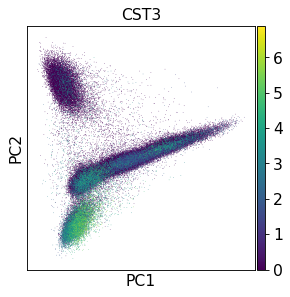

'example'

In [35]:
sc.pl.pca(adata, color='CST3') 

'''example'''

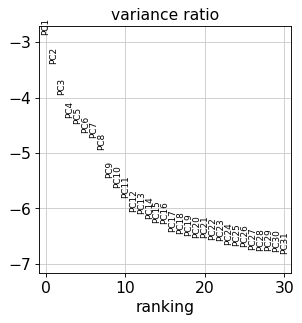

In [36]:
sc.pl.pca_variance_ratio(adata, log=True)

In [37]:
adata.write(results_file)

In [38]:
adata

AnnData object with n_obs × n_vars = 104559 × 7312
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Computing the neighborhood graph

In [39]:
import math

In [40]:
math.sqrt(adata.n_obs)

323.3558411409944

In [41]:
sc.pp.neighbors(adata, n_neighbors=323, n_pcs=15)

'''The authors select significant PCs(selecting 15 PCs) and k for nearest neighbor
calculation was set to root square of number of nuclei.'''

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:04)


'The authors select significant PCs(selecting 15 PCs) and k for nearest neighbor\ncalculation was set to root square of number of nuclei.'

# Embedding the neighborhood graph

In [ ]:
sc.tl.umap(adata)

'''The authors performed tSNE'''

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7'])

In [ ]:
# sc.pl.umap(adata, color=['CST3', 'NKG7'], use_raw=False)

'''Raw data is already performed normalization, logarithmization, and correction.
That is why this plot look same with above.'''

In [ ]:
# !pip install leidenalg

In [ ]:
# sc.tl.leiden(adata)

In [42]:
!pip install louvain

'''The authors performed leuvain clustering'''

'The authors performed leuvain clustering'

In [43]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:04:58)


In [45]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:07:51)


## - UMAP

In [ ]:
# sc.pl.umap(adata, color=['louvain'])

In [ ]:
# sc.pl.umap(adata, color=['SYT1', 'RBFOX3', 'CUX2', 'SATB2', 'RORB', 'TLE4'])

In [ ]:
# sc.pl.umap(adata, color=['GAD1', 'GAD2', 'PVALB', 'SST', 'VIP', 'SV2C'])

In [ ]:
# sc.pl.umap(adata, color=['NRGN', 'THY1'])

In [ ]:
# sc.pl.umap(adata, color=['SLC1A2', 'GFAP', 'PLP1', 'PDGFRA', 'PTPRC', 'CLDN5'])

## - t-SNE

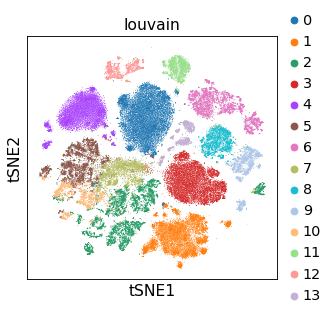

In [46]:
sc.pl.tsne(adata, color=['louvain'])

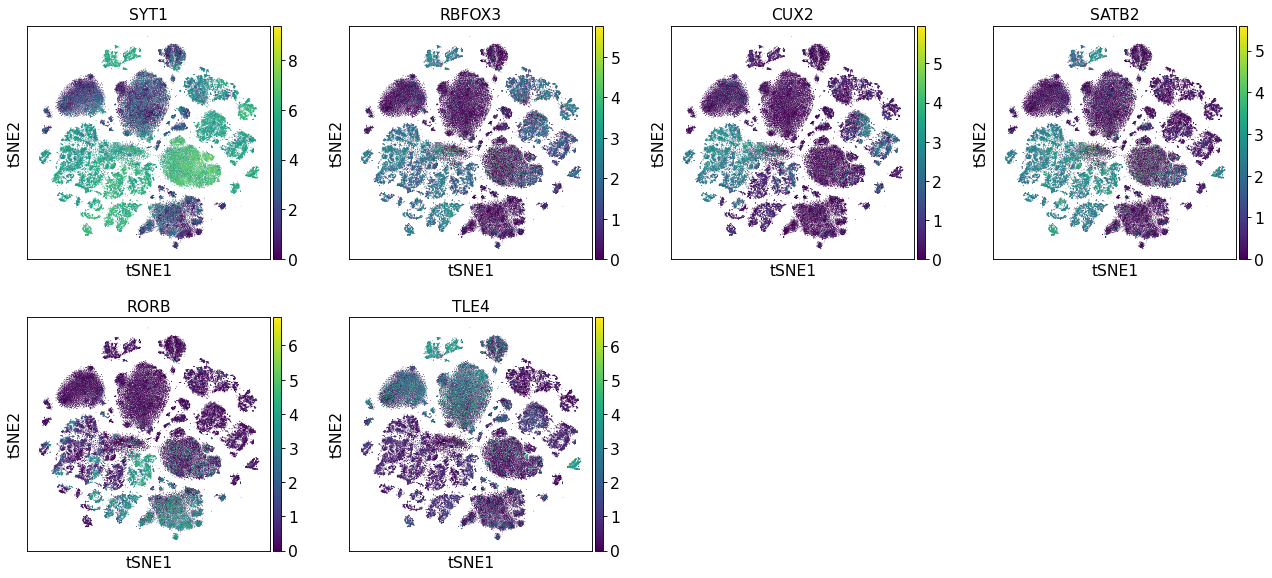

In [47]:
sc.pl.tsne(adata, color=['SYT1', 'RBFOX3', 'CUX2', 'SATB2', 'RORB', 'TLE4'])

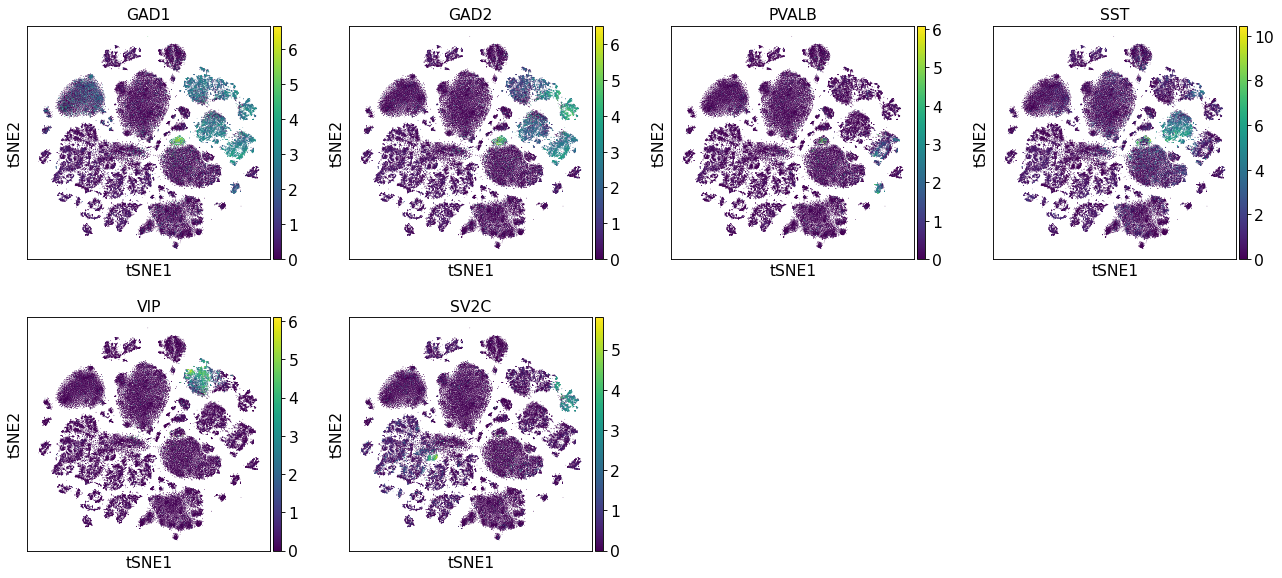

In [48]:
sc.pl.tsne(adata, color=['GAD1', 'GAD2', 'PVALB', 'SST', 'VIP', 'SV2C'])

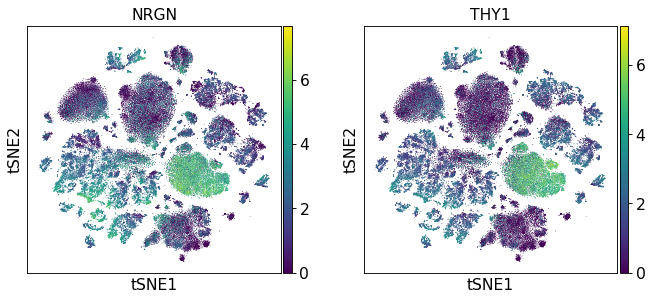

In [49]:
sc.pl.tsne(adata, color=['NRGN', 'THY1'])

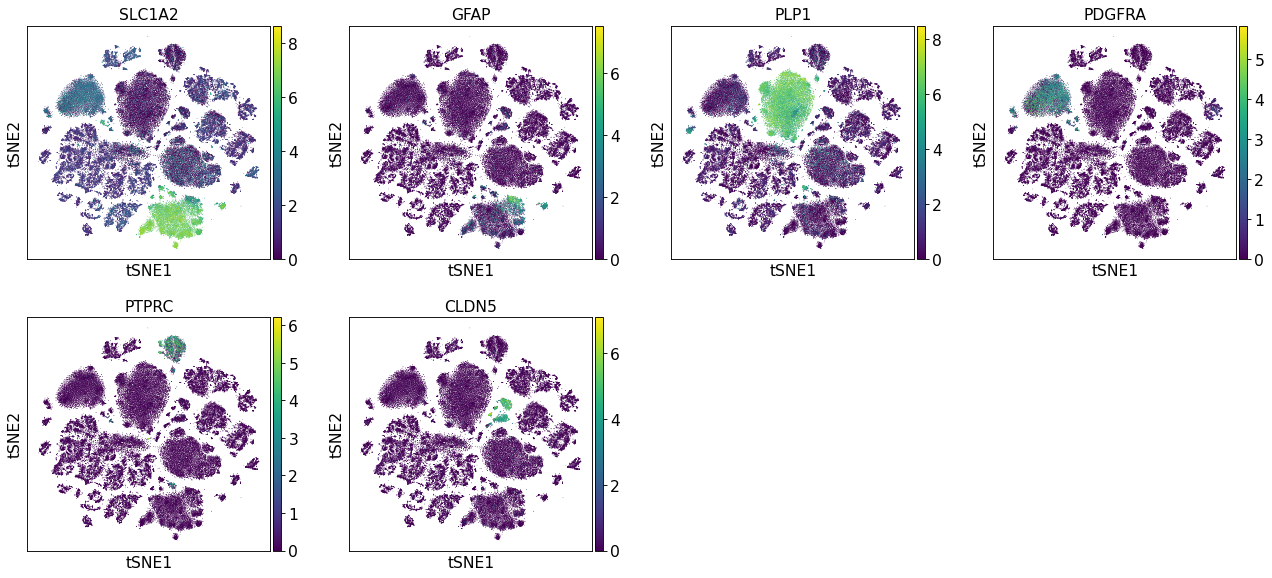

In [50]:
sc.pl.tsne(adata, color=['SLC1A2', 'GFAP', 'PLP1', 'PDGFRA', 'PTPRC', 'CLDN5'])

In [51]:
adata.write(results_file)

# Finding marker genes

In [ ]:
# sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

'''The simplest and fastest method is the t-test.'''

In [52]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:04:38)


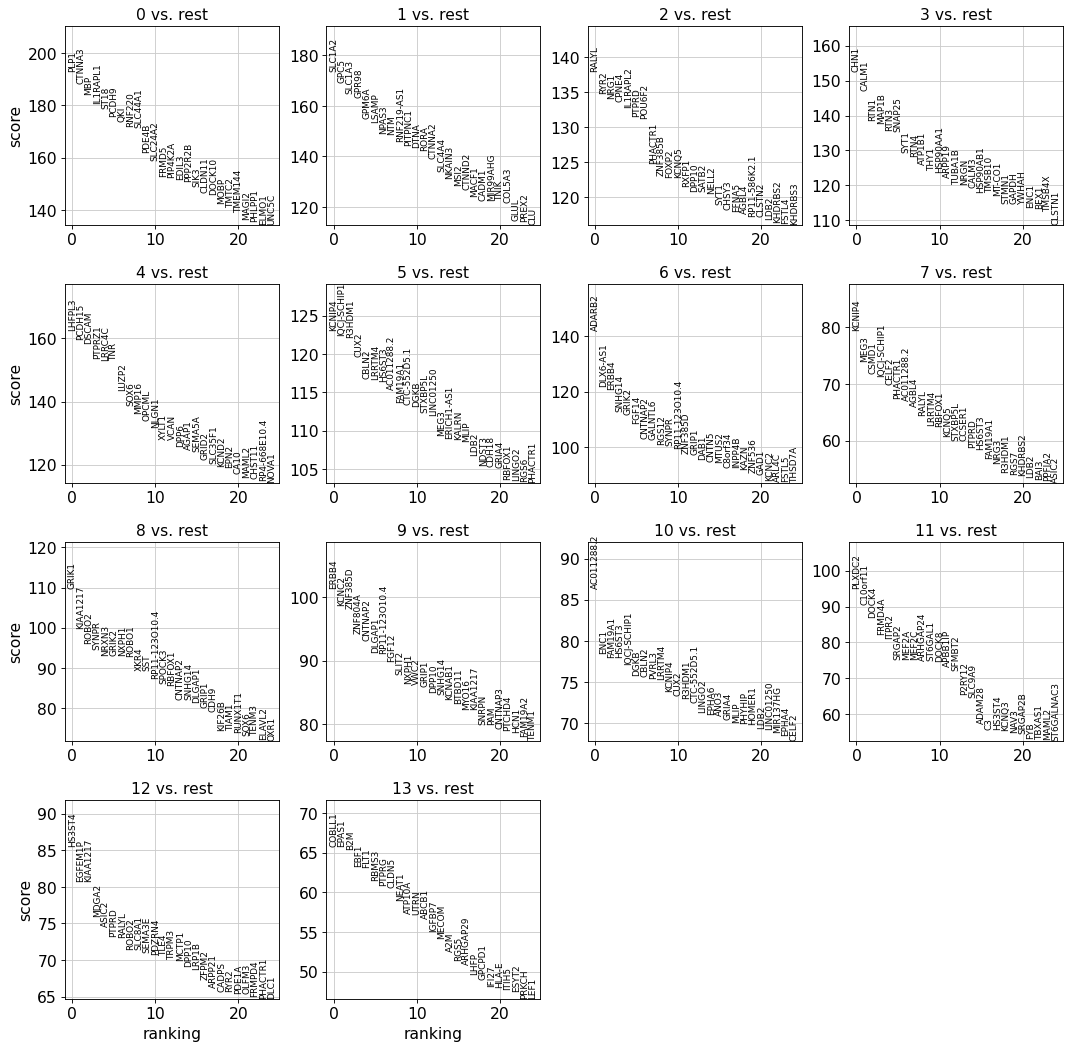

'The authors use MAST which is more powerful differential testing package,\na kind of wilcoxon method.'

In [53]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

'''The authors use MAST which is more powerful differential testing package,
a kind of wilcoxon method.'''

In [54]:
adata.write(results_file)

In [ ]:
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [110]:
marker_genes = ['SYT1', 'RBFOX3', 'CUX2', 'SATB2', 'RORB', 'TLE4', 'GAD1',
                'GAD2', 'PVALB', 'SST', 'VIP', 'SV2C', 'NRGN', 'THY1',
                'SLC1A2', 'GFAP', 'PLP1', 'PDGFRA', 'PTPRC', 'CLDN5']

In [55]:
adata = sc.read(results_file)

In [56]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,PLP1,SLC1A2,RALYL,CHN1,LHFPL3,KCNIP4,ADARB2,KCNIP4,GRIK1,ERBB4,AC011288.2,PLXDC2,HS3ST4,COBLL1
1,CTNNA3,GPC5,RYR2,CALM1,PCDH15,IQCJ-SCHIP1,DLX6-AS1,MEG3,KIAA1217,KCNC2,ENC1,C10orf11,EGFEM1P,EPAS1
2,MBP,SLC1A3,NRG1,RTN1,DSCAM,R3HDM1,ERBB4,CSMD1,ROBO2,ZNF385D,FAM19A1,DOCK4,KIAA1217,B2M
3,IL1RAPL1,GPR98,CPNE4,MAP1B,PTPRZ1,CUX2,SNHG14,IQCJ-SCHIP1,SYNPR,ZNF804A,HS6ST3,FRMD4A,MDGA2,EBF1
4,ST18,GPM6A,IL1RAPL2,RTN3,LRRC4C,CBLN2,GRIK2,CELF2,NRXN3,CNTNAP2,IQCJ-SCHIP1,ITPR2,ASIC2,FLT1


In [57]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

'''pvals가 안나오는 이유가 뭘까요...'''

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,9_n,9_p,10_n,10_p,11_n,11_p,12_n,12_p,13_n,13_p
0,PLP1,0.0,SLC1A2,0.0,RALYL,0.0,CHN1,0.0,LHFPL3,0.0,...,ERBB4,0.0,AC011288.2,0.0,PLXDC2,0.0,HS3ST4,0.0,COBLL1,0.0
1,CTNNA3,0.0,GPC5,0.0,RYR2,0.0,CALM1,0.0,PCDH15,0.0,...,KCNC2,0.0,ENC1,0.0,C10orf11,0.0,EGFEM1P,0.0,EPAS1,0.0
2,MBP,0.0,SLC1A3,0.0,NRG1,0.0,RTN1,0.0,DSCAM,0.0,...,ZNF385D,0.0,FAM19A1,0.0,DOCK4,0.0,KIAA1217,0.0,B2M,0.0
3,IL1RAPL1,0.0,GPR98,0.0,CPNE4,0.0,MAP1B,0.0,PTPRZ1,0.0,...,ZNF804A,0.0,HS6ST3,0.0,FRMD4A,0.0,MDGA2,0.0,EBF1,0.0
4,ST18,0.0,GPM6A,0.0,IL1RAPL2,0.0,RTN3,0.0,LRRC4C,0.0,...,CNTNAP2,0.0,IQCJ-SCHIP1,0.0,ITPR2,0.0,ASIC2,0.0,FLT1,0.0


ranking genes
    finished (0:00:25)


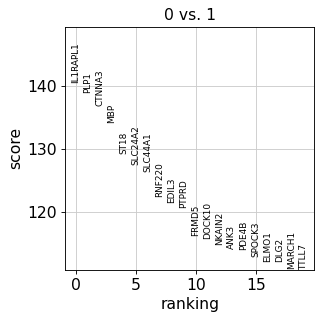

In [58]:
sc.tl.rank_genes_groups(adata, 'louvain', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

In [93]:
# sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

'''왜 안되는걸까요....'''

'왜 안되는걸까....'

In [60]:
adata = sc.read(results_file)

In [94]:
# sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

'''왜 일까요...'''

In [67]:
adata.uns.data

{'hvg': {'flavor': 'seurat'},
 'louvain': {'params': {'random_state': 0}},
 'louvain_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#ff9896', '#c5b0d5'], dtype=object),
 'neighbors': {'connectivities_key': 'connectivities',
  'distances_key': 'distances',
  'params': {'method': 'umap',
   'metric': 'euclidean',
   'n_neighbors': 323,
   'n_pcs': 15,
   'random_state': 0}},
 'pca': {'params': {'use_highly_variable': True, 'zero_center': True},
  'variance': array([97.73289466, 57.03847625, 32.76400897, 21.89742774, 19.38741775,
         16.7139841 , 15.19063104, 12.2249254 ,  7.34639148,  6.12368374,
          5.13302605,  4.01300265,  3.85304388,  3.53266698,  3.27650413,
          3.22986255,  2.79499058,  2.67511722,  2.59655945,  2.51374357,
          2.48694773,  2.3980258 ,  2.36828871,  2.21481244,  2.1531898 ,
          2.11102674,  2.01629538,  1.97203451,  1.96

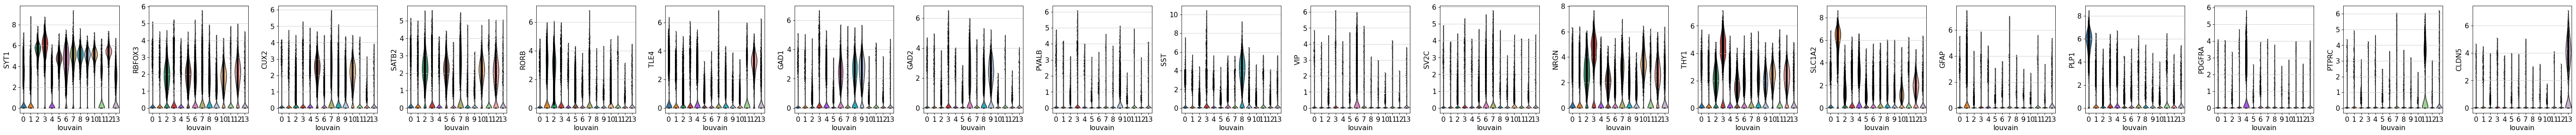

In [80]:
sc.pl.violin(adata, ['SYT1', 'RBFOX3', 'CUX2', 'SATB2', 'RORB', 'TLE4', 'GAD1',
                'GAD2', 'PVALB', 'SST', 'VIP', 'SV2C', 'NRGN', 'THY1',
                'SLC1A2', 'GFAP', 'PLP1', 'PDGFRA', 'PTPRC', 'CLDN5'], groupby='louvain')

In [95]:
new_cluster_names = [
    'Oligodendrocytes', 'AST-PP', 'L4', 'Neu-NRGN-2', 'OPC', 'L2/3', 'IN-VIP/IN-SV2C', 'L5/6-CC', 'IN-SST', 'IN-PV', 'Neu-mat', 'Microglia', 'L5/6', 'Endothelial']
adata.rename_categories('louvain', new_cluster_names)

In [123]:
from matplotlib import pyplot as plt

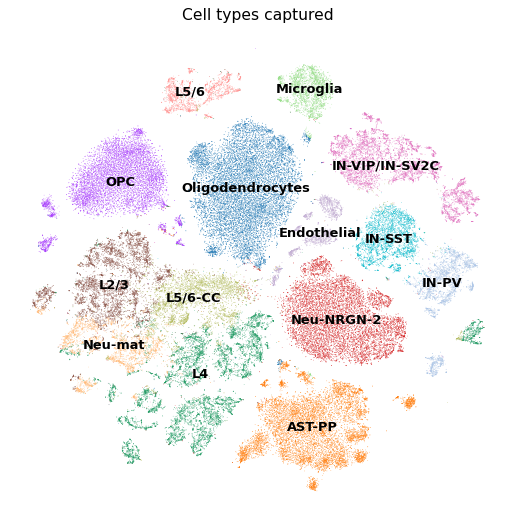

In [130]:
plot = sc.pl.tsne(adata, color='louvain', legend_loc='on data', title='Cell types captured',  legend_fontsize='small', frameon=False, return_fig=True)
plot.set_size_inches(8, 8)

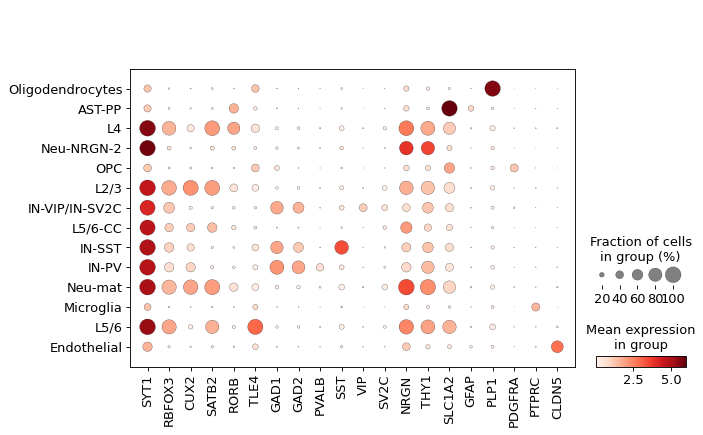

In [111]:
sc.pl.dotplot(adata, marker_genes, groupby='louvain');

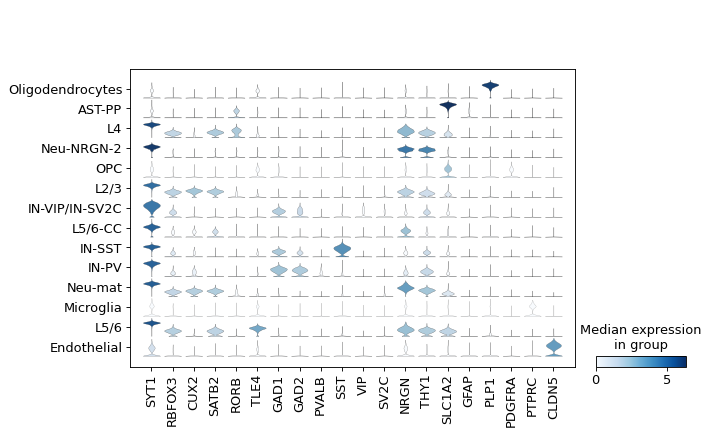

In [112]:
sc.pl.stacked_violin(adata, marker_genes, groupby='louvain', rotation=90);

In [113]:
adata

AnnData object with n_obs × n_vars = 104559 × 7312
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent', 'louvain'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [132]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [133]:
adata.raw.to_adata().write('./write/autism_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )